# Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

%matplotlib inline

# Import dataset

In [2]:
df = pd.read_excel('../../Data-gathering/Json/Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
           'Google Scholar link of the author',
           'Qs uni world ranking',
           'Qs uni country ranking',
           'Date of the first publication (year)',
           'Date of the last publication (year)',
            ], axis=1)
cols = df.columns
main_df = df

## MinMax Scaler

In [3]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(main_df)
min_maxed_df = pd.DataFrame(scaled, columns=[cols])
min_maxed_df

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
0,0.161649,0.557047,0.571429,0.751584,0.542889,0.454807,0.0,0.0,0.028689,0.021188,0.024367,0.024367,0.012376,0.010946,0.283081,0.495577,0.000000
1,0.137881,0.510067,0.467437,0.696232,0.389596,0.352322,0.0,0.0,0.069469,0.077349,0.033359,0.033359,0.030198,0.010077,0.101253,0.192491,0.010101
2,0.123603,0.503356,0.386555,0.316772,0.057001,0.113230,0.0,0.0,0.028689,0.030591,0.022648,0.022648,0.018317,0.019864,0.148098,0.142961,0.020202
3,0.118338,0.298658,0.115546,0.124708,0.048700,0.245333,0.0,0.0,0.106954,0.146178,0.083440,0.083440,0.012376,0.048258,0.207233,0.082368,0.030303
4,0.112919,0.392617,0.215861,0.345448,0.219148,0.399229,0.0,0.0,0.056307,0.076458,0.060220,0.060220,0.028218,0.016639,0.088640,0.102119,0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,0.002217,0.057047,0.013130,0.039013,0.026010,0.416410,0.0,0.0,0.003105,0.232127,0.001928,0.001928,0.025248,0.002856,0.001936,0.012914,0.959596
11937,0.002220,0.070470,0.013130,0.026676,0.018816,0.438833,0.0,0.0,0.001986,0.145126,0.001681,0.001681,0.012871,0.004175,0.003740,0.017090,0.969697
11938,0.002212,0.043624,0.011029,0.030343,0.016602,0.340909,0.0,0.0,0.006179,0.471724,0.002149,0.002149,0.018317,0.003660,0.002646,0.013781,0.979798
11939,0.002205,0.067114,0.020483,0.028009,0.011068,0.245989,0.0,0.0,0.001600,0.116040,0.001526,0.001526,0.016832,0.003951,0.002864,0.013824,0.989899


## Normalization

In [4]:
df_normalized = preprocessing.normalize(min_maxed_df)
dfcopy = df_normalized
df = pd.DataFrame(df_normalized, columns=[cols])
df

,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
0,0.112684,0.388313,0.398338,0.523923,0.378443,0.317042,0.0,0.0,0.019999,0.014770,0.016986,0.016986,0.008627,0.007631,0.197333,0.345463,0.000000
1,0.120020,0.443992,0.406885,0.606041,0.339127,0.306681,0.0,0.0,0.060470,0.067329,0.029038,0.029038,0.026286,0.008772,0.088137,0.167555,0.008793
2,0.162190,0.660496,0.507231,0.415664,0.074795,0.148579,0.0,0.0,0.037646,0.040141,0.029718,0.029718,0.024035,0.026065,0.194331,0.187592,0.026509
3,0.218054,0.550316,0.212909,0.229791,0.089735,0.452059,0.0,0.0,0.197077,0.269352,0.153748,0.153748,0.022805,0.088922,0.381855,0.151774,0.055837
4,0.148590,0.516647,0.284053,0.454577,0.288377,0.525347,0.0,0.0,0.074094,0.100612,0.079243,0.079243,0.037132,0.021895,0.116642,0.134379,0.053168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,0.002063,0.053091,0.012220,0.036308,0.024206,0.387535,0.0,0.0,0.002890,0.216031,0.001794,0.001794,0.023497,0.002658,0.001802,0.012018,0.893056
11937,0.002060,0.065411,0.012188,0.024761,0.017465,0.407331,0.0,0.0,0.001844,0.134708,0.001561,0.001561,0.011947,0.003875,0.003471,0.015863,0.900087
11938,0.001938,0.038223,0.009664,0.026587,0.014547,0.298702,0.0,0.0,0.005414,0.413322,0.001883,0.001883,0.016049,0.003207,0.002318,0.012075,0.858493
11939,0.002142,0.065180,0.019893,0.027202,0.010749,0.238901,0.0,0.0,0.001554,0.112697,0.001482,0.001482,0.016347,0.003837,0.002782,0.013426,0.961376


# Implement k-means

In [5]:
kmeansInertias = []
for k in range(2,17):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(df)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
    centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])
    
    display(centroidsTable)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.051696,0.336853,0.159601,0.230744,0.121473,0.597472,0.006703,0.011111,0.041687,0.270793,0.026290,0.026290,0.042843,0.02411,0.069486,0.111344,0.318732
C2,0.011250,0.135365,0.049673,0.073583,0.035985,0.399849,0.001902,0.006587,0.009384,0.225683,0.006216,0.006216,0.020946,0.01076,0.018374,0.045669,0.815799


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.01351,0.136984,0.040882,0.071647,0.042382,0.618421,0.001075,0.006335,0.025370,0.453051,0.011652,0.011652,0.027230,0.019402,0.024474,0.045213,0.481680
C2,0.01196,0.144118,0.054337,0.079343,0.038074,0.373731,0.002110,0.006916,0.008566,0.183857,0.006208,0.006208,0.021246,0.010083,0.018972,0.048288,0.849504
C3,0.07296,0.439444,0.227000,0.317389,0.162924,0.544584,0.010146,0.013380,0.046195,0.153826,0.032879,0.032879,0.048772,0.024570,0.093452,0.146561,0.292291


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.017393,0.121231,0.035136,0.050557,0.023739,0.461737,0.000874,0.005905,0.042310,0.639764,0.016661,0.016661,0.022855,0.029180,0.033762,0.034816,0.464857
C2,0.015110,0.196657,0.073296,0.133264,0.083659,0.693304,0.002472,0.007758,0.010483,0.214138,0.008208,0.008208,0.033822,0.010541,0.021985,0.072151,0.553287
C3,0.011665,0.138996,0.052086,0.073089,0.032851,0.351162,0.002043,0.006831,0.008365,0.182743,0.006086,0.006086,0.019994,0.010076,0.018777,0.045625,0.867156
C4,0.085295,0.474007,0.252248,0.340591,0.168461,0.507396,0.011595,0.014248,0.054044,0.154476,0.038229,0.038229,0.050528,0.027300,0.108258,0.155491,0.244806


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.020902,0.227818,0.080892,0.153356,0.099784,0.787662,0.001981,0.006920,0.021130,0.294400,0.014192,0.014192,0.039098,0.016459,0.031503,0.079834,0.304096
C2,0.010305,0.126559,0.045713,0.061157,0.024887,0.309527,0.001767,0.006376,0.007684,0.180511,0.005568,0.005568,0.017421,0.010030,0.017305,0.040249,0.894367
C3,0.092828,0.496206,0.271066,0.355722,0.169837,0.467157,0.012424,0.014720,0.056999,0.142039,0.040280,0.040280,0.051042,0.027938,0.117461,0.162062,0.249679
C4,0.016693,0.192919,0.077609,0.127204,0.072597,0.566994,0.003310,0.008729,0.010638,0.180822,0.008230,0.008230,0.030775,0.009964,0.023574,0.069487,0.710257
C5,0.015230,0.106891,0.030079,0.041042,0.017762,0.421403,0.000790,0.005757,0.039283,0.639513,0.014670,0.014670,0.020569,0.028311,0.030607,0.030489,0.521379


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.019352,0.223886,0.079008,0.151331,0.099035,0.790070,0.002313,0.007783,0.018344,0.279608,0.012803,0.012803,0.039258,0.015140,0.028945,0.078862,0.326126
C2,0.009709,0.126625,0.044736,0.060059,0.024356,0.288770,0.001554,0.006359,0.007567,0.171537,0.005431,0.005431,0.017173,0.010184,0.016682,0.040043,0.906733
C3,0.038804,0.337976,0.158683,0.222013,0.108803,0.474924,0.007866,0.013565,0.021081,0.127240,0.016525,0.016525,0.041021,0.017331,0.052662,0.112401,0.677774
C4,0.098873,0.502824,0.277692,0.366893,0.177974,0.473991,0.012310,0.014462,0.062853,0.147033,0.043858,0.043858,0.051495,0.029039,0.123820,0.164292,0.185053
C5,0.005140,0.093624,0.027079,0.055438,0.036001,0.560559,0.000666,0.004593,0.005562,0.256117,0.003683,0.003683,0.020576,0.006563,0.009165,0.037132,0.749476
C6,0.017882,0.118068,0.033776,0.045365,0.019317,0.413560,0.000915,0.006411,0.046802,0.678707,0.017406,0.017406,0.022224,0.032702,0.036044,0.032475,0.464913


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.022218,0.250545,0.093841,0.177706,0.116862,0.794868,0.002563,0.008085,0.017518,0.240530,0.013425,0.013425,0.039640,0.015230,0.033186,0.090020,0.306031
C2,0.009486,0.128631,0.045819,0.063143,0.026760,0.307071,0.001521,0.005877,0.006529,0.145525,0.005091,0.005091,0.017664,0.009220,0.015957,0.041447,0.908427
C3,0.025714,0.154914,0.046623,0.066243,0.031120,0.501750,0.001194,0.007453,0.062519,0.692223,0.024614,0.024614,0.028050,0.037878,0.047066,0.043442,0.311581
C4,0.005575,0.107432,0.032395,0.067789,0.045170,0.615907,0.001064,0.005461,0.004817,0.225185,0.003686,0.003686,0.022929,0.006250,0.009653,0.043861,0.711932
C5,0.040597,0.346462,0.163746,0.224883,0.107757,0.460862,0.008214,0.013715,0.022146,0.128305,0.017221,0.017221,0.042495,0.017919,0.054889,0.112998,0.680039
C6,0.102477,0.511534,0.286006,0.373213,0.177944,0.458534,0.012865,0.014820,0.063316,0.139893,0.044614,0.044614,0.052233,0.029308,0.127630,0.166106,0.182714
C7,0.007585,0.078754,0.021011,0.029496,0.012447,0.345068,0.000666,0.005651,0.016188,0.484141,0.006842,0.006842,0.015543,0.015706,0.015725,0.023870,0.763838


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.041887,0.354213,0.168257,0.230828,0.111014,0.466879,0.008418,0.013623,0.022561,0.127405,0.017675,0.017675,0.042543,0.018146,0.056140,0.115859,0.668190
C2,0.005769,0.103263,0.033190,0.063271,0.038652,0.490290,0.001044,0.005242,0.004489,0.182212,0.003478,0.003478,0.020320,0.005868,0.009298,0.039725,0.824211
C3,0.110096,0.524974,0.299346,0.380376,0.174697,0.428445,0.013610,0.015394,0.068066,0.136015,0.047690,0.047690,0.051294,0.030692,0.138217,0.169693,0.173476
C4,0.008553,0.081965,0.021921,0.029966,0.012367,0.347079,0.000637,0.005452,0.018905,0.519209,0.007780,0.007780,0.015585,0.018258,0.018233,0.024337,0.735546
C5,0.031933,0.309252,0.126856,0.231017,0.149601,0.771122,0.003684,0.008537,0.023738,0.214315,0.017929,0.017929,0.044849,0.017551,0.044665,0.111214,0.242760
C6,0.026978,0.160878,0.048821,0.069631,0.033062,0.511373,0.001352,0.008560,0.065784,0.698832,0.025926,0.025926,0.029259,0.038338,0.048558,0.045039,0.278426
C7,0.007499,0.132416,0.039548,0.080701,0.053661,0.721526,0.001152,0.006038,0.007011,0.274902,0.005141,0.005141,0.028384,0.008473,0.012485,0.049754,0.568136
C8,0.011152,0.138548,0.050750,0.064351,0.023643,0.258242,0.001890,0.006521,0.007712,0.146932,0.005884,0.005884,0.017276,0.010797,0.018975,0.042887,0.921515


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.027471,0.158601,0.048170,0.068594,0.032443,0.497908,0.001344,0.008336,0.068416,0.710386,0.026581,0.026581,0.029312,0.039560,0.049627,0.044125,0.274899
C2,0.009052,0.084871,0.022886,0.031085,0.012771,0.349893,0.000674,0.005675,0.019845,0.528240,0.008177,0.008177,0.016029,0.018923,0.018943,0.024938,0.727482
C3,0.004674,0.094091,0.028653,0.058971,0.038050,0.522916,0.000819,0.004687,0.003915,0.196217,0.003008,0.003008,0.019915,0.005398,0.007972,0.038198,0.802582
C4,0.031076,0.301591,0.122000,0.226210,0.148714,0.782074,0.003539,0.008709,0.024532,0.226811,0.018144,0.018144,0.046781,0.017825,0.044042,0.108418,0.212765
C5,0.047356,0.387130,0.187056,0.266950,0.136657,0.534559,0.009229,0.013426,0.026401,0.138900,0.020278,0.020278,0.042382,0.018938,0.061764,0.130756,0.560816
C6,0.006462,0.104691,0.033679,0.045359,0.016991,0.264060,0.000902,0.004687,0.005162,0.162836,0.003934,0.003934,0.014632,0.008908,0.012630,0.033956,0.928600
C7,0.030016,0.276731,0.123162,0.160131,0.069194,0.362622,0.005906,0.012848,0.016632,0.111829,0.013107,0.013107,0.034882,0.015836,0.042616,0.084584,0.819708
C8,0.113438,0.528960,0.302674,0.382947,0.175311,0.422497,0.013537,0.015137,0.070650,0.136747,0.049374,0.049374,0.051514,0.031452,0.142262,0.170508,0.154198
C9,0.007708,0.136511,0.040411,0.081555,0.053553,0.735652,0.001195,0.006470,0.007347,0.287511,0.005387,0.005387,0.028592,0.009083,0.012919,0.050721,0.541734


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.150600,0.597099,0.280840,0.288974,0.095607,0.331661,0.013111,0.019953,0.115256,0.204476,0.077059,0.077059,0.053082,0.054697,0.211877,0.150420,0.174867
C2,0.029894,0.276536,0.123798,0.162712,0.071699,0.371377,0.005994,0.013050,0.016490,0.111639,0.012985,0.012985,0.034740,0.015539,0.042329,0.086682,0.814073
C3,0.024931,0.149111,0.044920,0.064779,0.031097,0.496389,0.001222,0.008046,0.064274,0.714997,0.024425,0.024425,0.028652,0.037920,0.045483,0.041935,0.287114
C4,0.008929,0.085040,0.023002,0.031314,0.012881,0.350361,0.000652,0.005612,0.019643,0.528331,0.008057,0.008057,0.016136,0.018535,0.018615,0.025012,0.727786
C5,0.073881,0.443803,0.288504,0.439075,0.245120,0.527449,0.012663,0.010229,0.034378,0.098150,0.025774,0.025774,0.048721,0.014312,0.080034,0.179071,0.163436
C6,0.007014,0.109304,0.035535,0.046472,0.016623,0.249853,0.000929,0.004800,0.005529,0.161241,0.004232,0.004232,0.014549,0.009625,0.013779,0.034608,0.932195
C7,0.026161,0.271600,0.099415,0.180419,0.115421,0.809147,0.002716,0.009198,0.023213,0.264867,0.016790,0.016790,0.043051,0.018079,0.039398,0.093435,0.221602
C8,0.046402,0.385565,0.183943,0.262225,0.134060,0.547980,0.008768,0.013774,0.026091,0.142322,0.020049,0.020049,0.044460,0.018734,0.059327,0.128014,0.554430
C9,0.007174,0.130570,0.039130,0.080713,0.053707,0.712285,0.001213,0.005902,0.006558,0.268028,0.004887,0.004887,0.027870,0.008150,0.012109,0.050237,0.585840
C10,0.004209,0.087620,0.025893,0.052546,0.033033,0.493252,0.000638,0.004185,0.003732,0.194778,0.002802,0.002802,0.018548,0.005265,0.007264,0.034684,0.825410


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.030423,0.280932,0.126269,0.165701,0.072863,0.373293,0.006131,0.013229,0.016684,0.112444,0.013151,0.013151,0.027847,0.015683,0.043349,0.088407,0.814041
C2,0.008920,0.084510,0.022743,0.030806,0.012557,0.346831,0.000628,0.005570,0.019652,0.527853,0.008083,0.008083,0.014756,0.018866,0.018782,0.024785,0.730439
C3,0.026626,0.274317,0.100921,0.184533,0.119089,0.809113,0.002715,0.009196,0.023347,0.261537,0.016954,0.016954,0.041013,0.018044,0.039914,0.094983,0.219706
C4,0.004295,0.088513,0.026220,0.053256,0.033555,0.497207,0.000706,0.004298,0.003811,0.196779,0.002849,0.002849,0.018109,0.005303,0.007353,0.035014,0.822373
C5,0.077007,0.447744,0.296271,0.446187,0.246466,0.518412,0.012950,0.010529,0.036357,0.096861,0.026737,0.026737,0.041297,0.014283,0.082979,0.182069,0.158403
C6,0.007040,0.109830,0.035951,0.047341,0.017199,0.253661,0.000933,0.004829,0.005478,0.158902,0.004211,0.004211,0.014657,0.009396,0.013732,0.035162,0.931419
C7,0.007179,0.130726,0.039018,0.080022,0.053216,0.715500,0.001187,0.005855,0.006581,0.269720,0.004906,0.004906,0.027355,0.008229,0.012130,0.049947,0.581780
C8,0.046220,0.386402,0.184498,0.264232,0.135735,0.554357,0.008714,0.013769,0.025671,0.142059,0.019846,0.019846,0.037629,0.018521,0.059000,0.129514,0.553201
C9,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944
C10,0.148639,0.603436,0.275652,0.281198,0.091335,0.343689,0.013211,0.020357,0.116116,0.217637,0.077506,0.077506,0.034295,0.056604,0.216113,0.151833,0.182134


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.028925,0.270528,0.120550,0.159486,0.070617,0.369962,0.005793,0.012582,0.016122,0.111182,0.012646,0.012646,0.027400,0.015139,0.040842,0.084675,0.824081
C2,0.128938,0.495696,0.182429,0.205376,0.078825,0.430229,0.006559,0.019719,0.163920,0.395967,0.093622,0.093622,0.034831,0.072899,0.206629,0.117402,0.206291
C3,0.008332,0.084168,0.022793,0.031730,0.013514,0.364063,0.000682,0.006101,0.017595,0.503124,0.007449,0.007449,0.014913,0.016062,0.017175,0.025186,0.743828
C4,0.111207,0.535292,0.341973,0.431502,0.194852,0.401703,0.015665,0.013594,0.051724,0.093067,0.038691,0.038691,0.036927,0.022447,0.129580,0.188754,0.142540
C5,0.038322,0.357289,0.167242,0.301420,0.195967,0.726569,0.005494,0.008435,0.021373,0.146997,0.017210,0.017210,0.044705,0.014384,0.047604,0.134141,0.244475
C6,0.007610,0.135480,0.042509,0.086403,0.057172,0.691618,0.001536,0.006719,0.006428,0.242425,0.004899,0.004899,0.026726,0.007763,0.012824,0.052971,0.621504
C7,0.007088,0.109680,0.035657,0.045809,0.015764,0.239468,0.000967,0.005020,0.005578,0.161045,0.004279,0.004279,0.014341,0.009862,0.014049,0.034583,0.935197
C8,0.017996,0.115723,0.032395,0.045728,0.020922,0.439601,0.000685,0.005959,0.052737,0.758316,0.018385,0.018385,0.019015,0.038299,0.036296,0.032857,0.332584
C9,0.047633,0.394938,0.190672,0.262144,0.128005,0.516979,0.009861,0.015020,0.024929,0.136750,0.019628,0.019628,0.036600,0.018942,0.062068,0.131392,0.586125
C10,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.017280,0.201301,0.061844,0.114817,0.073101,0.821620,0.001545,0.008320,0.019958,0.348512,0.013412,0.013412,0.036392,0.017469,0.028913,0.066779,0.255930
C2,0.027948,0.265153,0.117266,0.156461,0.069925,0.373980,0.005566,0.012215,0.015758,0.111681,0.012343,0.012343,0.027249,0.014787,0.039358,0.083011,0.825955
C3,0.095951,0.478013,0.346760,0.480241,0.239185,0.426504,0.016379,0.011073,0.040873,0.076927,0.030583,0.030583,0.036664,0.014746,0.102074,0.196011,0.139914
C4,0.006946,0.110564,0.036147,0.047391,0.016999,0.250361,0.000944,0.004834,0.005117,0.149949,0.004099,0.004099,0.014652,0.009237,0.013547,0.035210,0.935034
C5,0.008229,0.097191,0.026154,0.043135,0.023202,0.570597,0.000653,0.005389,0.014879,0.512798,0.007088,0.007088,0.019762,0.013337,0.015278,0.031699,0.593437
C6,0.009120,0.084002,0.022648,0.027843,0.009215,0.260297,0.000748,0.006233,0.020461,0.520068,0.008255,0.008255,0.013197,0.021438,0.020537,0.024053,0.773948
C7,0.049210,0.398519,0.194175,0.265364,0.128311,0.505986,0.009817,0.015017,0.026446,0.136685,0.020501,0.020501,0.037211,0.019487,0.064018,0.131806,0.588769
C8,0.003810,0.080615,0.022791,0.045902,0.028435,0.484608,0.000571,0.004181,0.003763,0.209112,0.002688,0.002688,0.017046,0.005246,0.006867,0.031689,0.829452
C9,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944
C10,0.046390,0.392239,0.179771,0.300384,0.186430,0.707528,0.005535,0.009659,0.029050,0.163972,0.021827,0.021827,0.045251,0.017744,0.058437,0.136988,0.233338


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.008329,0.153636,0.047644,0.100277,0.068250,0.797387,0.001577,0.007054,0.006540,0.246815,0.005410,0.005410,0.033711,0.008555,0.012601,0.056296,0.462829
C2,0.007811,0.118933,0.040009,0.049580,0.016163,0.223706,0.001155,0.005756,0.005372,0.139158,0.004440,0.004440,0.014475,0.010132,0.015273,0.036923,0.942932
C3,0.047213,0.390036,0.187945,0.266004,0.135195,0.539548,0.008939,0.013556,0.025900,0.139872,0.019984,0.019984,0.037424,0.018596,0.059917,0.129367,0.565177
C4,0.031013,0.283369,0.126968,0.163638,0.069800,0.362254,0.006352,0.013777,0.017053,0.112363,0.013438,0.013438,0.027931,0.016174,0.044302,0.087306,0.819945
C5,0.006733,0.123337,0.040189,0.084116,0.056568,0.617094,0.001245,0.005533,0.005017,0.185567,0.004036,0.004036,0.023277,0.006049,0.011068,0.051686,0.725562
C6,0.025211,0.120962,0.033896,0.041366,0.015042,0.328337,0.001029,0.007029,0.079518,0.812306,0.026644,0.026644,0.016117,0.055513,0.053602,0.030826,0.305322
C7,0.028928,0.210296,0.066026,0.103952,0.055668,0.688071,0.001861,0.010457,0.050608,0.562661,0.025572,0.025572,0.031953,0.028902,0.048149,0.063343,0.230710
C8,0.007911,0.090988,0.024780,0.039883,0.021026,0.530606,0.000539,0.004995,0.014991,0.509043,0.006811,0.006811,0.018151,0.013154,0.015273,0.029991,0.636168
C9,0.148661,0.606783,0.269636,0.274428,0.089262,0.349110,0.011637,0.020008,0.116906,0.219649,0.078716,0.078716,0.034677,0.057427,0.218036,0.150212,0.188472
C10,0.036069,0.348231,0.145821,0.255171,0.163211,0.770100,0.004256,0.009349,0.023609,0.186618,0.018465,0.018465,0.044563,0.017364,0.048202,0.121641,0.204123


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.034537,0.234227,0.075526,0.115087,0.059854,0.671458,0.002085,0.010850,0.060028,0.566859,0.030244,0.030244,0.033566,0.032372,0.056240,0.068493,0.221087
C2,0.004359,0.087388,0.025909,0.049224,0.028737,0.446134,0.000578,0.003669,0.003876,0.186106,0.002899,0.002899,0.017292,0.005553,0.007560,0.033070,0.856729
C3,0.091164,0.461484,0.341447,0.489672,0.252526,0.436723,0.016501,0.010602,0.039074,0.077018,0.029029,0.029029,0.035904,0.013568,0.096834,0.198580,0.135677
C4,0.066381,0.476985,0.232145,0.274349,0.108624,0.440502,0.013109,0.018569,0.036671,0.152108,0.027501,0.027501,0.040311,0.026919,0.088600,0.139164,0.550484
C5,0.008035,0.079773,0.021327,0.026982,0.009160,0.262883,0.000712,0.006060,0.017305,0.473640,0.007277,0.007277,0.013014,0.017041,0.017644,0.023382,0.809417
C6,0.024556,0.274003,0.122261,0.210360,0.126676,0.589543,0.004661,0.009925,0.014038,0.133743,0.011216,0.011216,0.032945,0.011410,0.032695,0.105546,0.652283
C7,0.007131,0.113223,0.037268,0.047100,0.015675,0.229683,0.001050,0.005439,0.005077,0.144164,0.004161,0.004161,0.014338,0.009704,0.014133,0.035582,0.941927
C8,0.160987,0.609336,0.268330,0.273403,0.089925,0.333432,0.012539,0.021992,0.131401,0.222957,0.087539,0.087539,0.033439,0.062611,0.237489,0.148608,0.153145
C9,0.046936,0.397786,0.180283,0.296922,0.182581,0.710326,0.005066,0.009522,0.029070,0.167333,0.022255,0.022255,0.044690,0.018397,0.060219,0.138409,0.221851
C10,0.010206,0.175737,0.055061,0.115691,0.079448,0.837447,0.001146,0.006414,0.007671,0.248430,0.006557,0.006557,0.036572,0.010112,0.016050,0.063444,0.357167


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Citation,h-index,i10-index,No. Of Publications,No. Of publications without citation,Uncited rate,No.Of US pattent,Patents and Publications balance,The most citation,The most citation density,Sum of top 10 citations,Sum of top 10 citations density,Observation time window (years),average citation per publication,average citation per year,average publication per year,Author's positin in top 100 pages
C1,0.020972,0.248908,0.105657,0.182524,0.109516,0.566166,0.003521,0.008743,0.012031,0.129376,0.009827,0.009827,0.031886,0.010786,0.028300,0.093148,0.704428
C2,0.003156,0.074849,0.019559,0.044051,0.029763,0.575207,0.000557,0.004817,0.003222,0.236521,0.002379,0.002379,0.017917,0.004745,0.005971,0.031617,0.763208
C3,0.016761,0.156307,0.045492,0.079309,0.046231,0.689399,0.001064,0.007864,0.034197,0.603295,0.015278,0.015278,0.028987,0.021200,0.027913,0.047993,0.240692
C4,0.123688,0.450643,0.164334,0.196017,0.082042,0.466082,0.005223,0.016782,0.179252,0.437141,0.097796,0.097796,0.032730,0.076292,0.207008,0.114271,0.175515
C5,0.037308,0.310372,0.141995,0.169073,0.062927,0.312049,0.007895,0.016400,0.020950,0.116614,0.016094,0.016094,0.027497,0.019295,0.054118,0.091397,0.824502
C6,0.018294,0.106469,0.028931,0.033391,0.010314,0.290115,0.000720,0.006546,0.058714,0.817116,0.019678,0.019678,0.014825,0.051145,0.041368,0.027507,0.368236
C7,0.007658,0.117250,0.038821,0.046036,0.013520,0.203748,0.001093,0.005723,0.005326,0.142746,0.004376,0.004376,0.013848,0.010590,0.015511,0.035554,0.948199
C8,0.057998,0.450625,0.218877,0.283283,0.129708,0.521018,0.011462,0.016355,0.029509,0.138339,0.023441,0.023441,0.040078,0.022255,0.074328,0.140067,0.510859
C9,0.044553,0.200064,0.100462,0.152535,0.082611,0.263407,0.004329,0.002272,0.033166,0.121184,0.021078,0.021078,0.786005,0.015498,0.001023,0.001279,0.329944
C10,0.027378,0.304927,0.121208,0.223411,0.145937,0.803228,0.003224,0.007976,0.017975,0.198292,0.014625,0.014625,0.044227,0.015110,0.038336,0.108337,0.226828


# Kmeans SSE Table

In [6]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,17)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
SSE,1677.084744,1318.300064,1120.660465,990.20273,880.630095,808.765762,757.065052,716.613803,680.815403,645.274375,618.224925,590.713081,568.988206,548.50736,529.041363


# Elbow Method

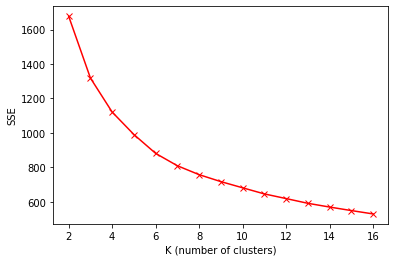

In [7]:
plt.plot(range(2,17), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

In [8]:
type(dfcopy)

numpy.ndarray

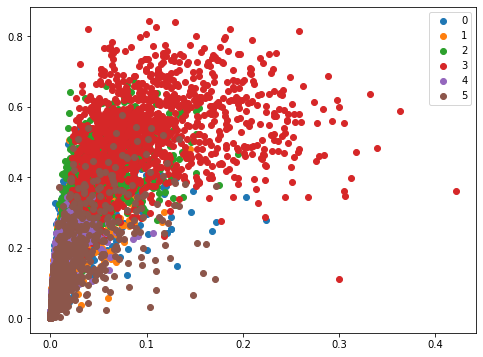

In [14]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(dfcopy)

label = kmeans.fit_predict(dfcopy)
fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(dfcopy[label == i , 0] , dfcopy[label == i , 1] , label = i)
plt.legend()
plt.show()

# PCA

## Implementing PCA

In [11]:
Newdf = pd.DataFrame(df, columns=[cols])

#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [14]:
type(data)

numpy.ndarray

In [16]:
kmeansInertias = []
clusterCenters = []
for k in range(2,17):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,17)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
SSE,986.050809,630.375095,493.210901,374.529892,320.252551,277.431067,240.861865,209.806576,193.305109,176.768399,161.939263,149.704776,138.725028,130.232989,122.678459


## Elbow Method

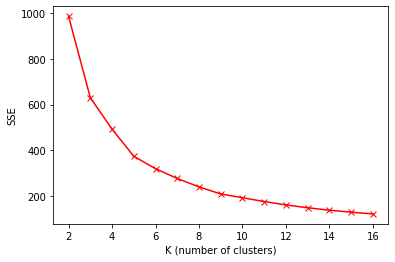

In [17]:
plt.plot(range(2,17), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Plot data with K = 5

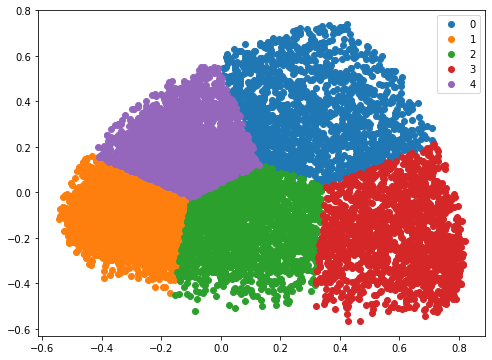

In [24]:
kmeans = KMeans(n_clusters=5 ,random_state=0)
kmeans.fit(data)

label = kmeans.fit_predict(data)
fig, ax = plt.subplots(figsize=(8, 6))

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()